### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!conda install -c conda-forge matplotlib

ERROR: Could not find a version that satisfies the requirement numpydjiow (from versions: none)
ERROR: No matching distribution found for numpydjiow


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
df = pd.read_csv('coupons.csv')

In [7]:
print(df.head())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

2. Investigate the dataset for missing or problematic data.

In [9]:
print(df.isna().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [11]:
#Drop "car" since it contains no values.
df.drop('car', axis=1, inplace=True)

In [14]:
# Rename 'passanger' to 'passenger'
df.rename(columns={'passanger': 'passenger'}, inplace=True)

In [15]:
# Impute missing values with the mode of each column
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
#Check if the above worked.
print(df.isna().sum())

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

I chose to remove "cars" entirely as the column contained no data, and the other missing fields were imputed using the mode of the existing values in their respective columns, since the values were text based. 

4. What proportion of the total observations chose to accept the coupon? 


In [19]:
proportion_accepted = df['Y'].sum() / df.shape[0]
print(f"The proportion of total observations that chose to accept the coupon is {proportion_accepted:.4f}")

The proportion of total observations that chose to accept the coupon is 0.5684


5. Use a bar plot to visualize the `coupon` column.

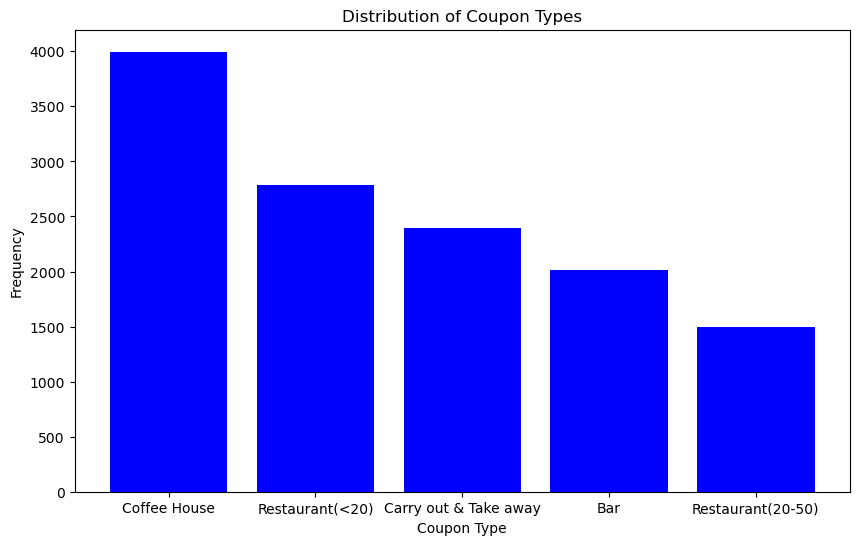

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each coupon type
coupon_counts = df['coupon'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(coupon_counts.index, coupon_counts.values, color='blue')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.title('Distribution of Coupon Types')
plt.show()

6. Use a histogram to visualize the temperature column.

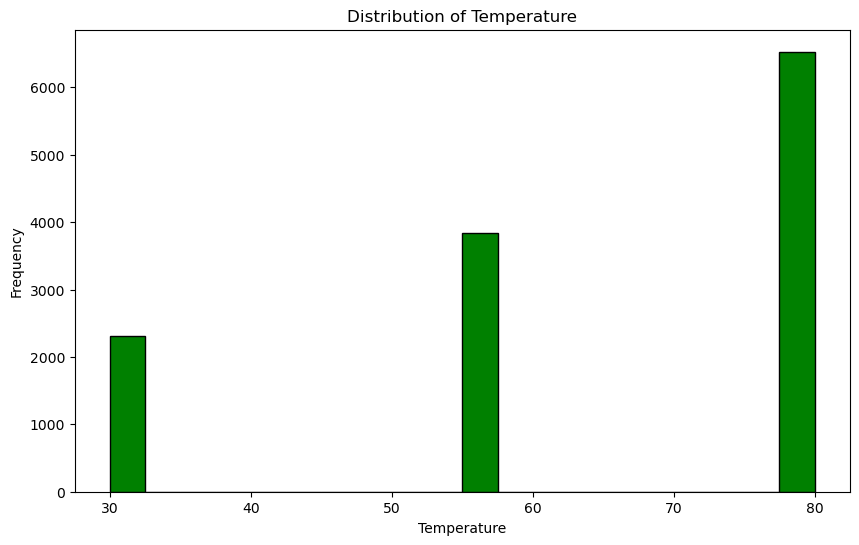

In [21]:

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=20, color='green', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
# Filter the DataFrame to include only 'Bar' coupons
bar_coupons_df = df[df['coupon'] == 'Bar']
print(bar_coupons_df.head())

        destination  passenger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       1~3   
13  Female  21  Unmarried partner  ...        never       1~3   
17  Female  21  Unmarried partner  ...        never       1~3   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [25]:
# Filter the DataFrame for "bar" coupons
bar_coupons_accepted = bar_coupons_df[bar_coupons_df['Y'] == 1]

# Calculate the proportion of accepted "bar" coupons
proportion_bar_coupons_accepted = len(bar_coupons_accepted) / len(bar_coupons_df)

proportion_bar_coupons_accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
# Filter the DataFrame based on the frequency of going to a bar
less_frequent = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
more_frequent = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Compute the acceptance rate for both groups
acceptance_rate_less = less_frequent['Y'].mean()
acceptance_rate_more = more_frequent['Y'].mean()

print(f"Acceptance rate for less frequent bar-goers: {acceptance_rate_less}")
print(f"Acceptance rate for more frequent bar-goers: {acceptance_rate_more}")



Acceptance rate for less frequent bar-goers: 0.37073707370737075
Acceptance rate for more frequent bar-goers: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
# Convert 'age' to numeric, given that it might be stored as strings
df['age'] = df['age'].replace('50plus', '50')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Filter DataFrame for individuals who go to a bar more than once a month and are over 25
criteria_group = df[(df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df['age'] > 25)]

# Filter DataFrame for all others
other_group = df[~df.index.isin(criteria_group.index)]

# Calculate acceptance rate for both groups
acceptance_rate_criteria = criteria_group['Y'].mean()
acceptance_rate_others = other_group['Y'].mean()

print(f"Acceptance rate for criteria group: {acceptance_rate_criteria}")
print(f"Acceptance rate for other group: {acceptance_rate_others}")

Acceptance rate for criteria group: 0.625688851208139
Acceptance rate for other group: 0.5553510895883778


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [47]:
# Filter DataFrame for individuals meeting all three criteria
criteria_group = df[
    (df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (df['passanger'] != 'Kid(s)') &
    (~df['occupation'].isin(['Farming, Fishing, and Forestry']))
]

# Filter DataFrame for all others
other_group = df[~df.index.isin(criteria_group.index)]

# Calculate acceptance rate for both groups
acceptance_rate_criteria = criteria_group['Y'].mean()
acceptance_rate_others = other_group['Y'].mean()

print(f"Acceptance rate for criteria group: {acceptance_rate_criteria}")
print(f"Acceptance rate for other group: {acceptance_rate_others}")

Acceptance rate for criteria group: 0.6231060606060606
Acceptance rate for other group: 0.5459501557632399


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [48]:
df = pd.read_csv('coupons.csv')
# Convert 'age' and 'income' to numeric, if they're not already
df['age'] = df['age'].replace('50plus', '50')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Define the three groups
group1 = df[
    (df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (df['passanger'] != 'Kid(s)') &
    (df['maritalStatus'] != 'Widowed')
]

group2 = df[
    (df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (df['age'] < 30)
]

group3 = df[
    (df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (df['income'] < 50000)
]

# Calculate the acceptance rates
acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()

print(f"Acceptance rate for Group 1: {acceptance_rate_group1}")
print(f"Acceptance rate for Group 2: {acceptance_rate_group2}")
print(f"Acceptance rate for Group 3: {acceptance_rate_group3}")

Acceptance rate for Group 1: 0.6231060606060606
Acceptance rate for Group 2: 0.6284549161758043
Acceptance rate for Group 3: nan


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Answer: There may be a positive correllation between having a habit visiting restaurants or bars frequently and a willingness to accept coupons to a bar. We may find other correlations or alternative hypotheses on exploring the data further.


In [52]:
# Check data type
print(df['toCoupon_GEQ5min'].dtypes)

# Convert to numeric, coercing errors to NaN
df['toCoupon_GEQ5min'] = pd.to_numeric(df['toCoupon_GEQ5min'], errors='coerce')

int64


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [59]:
print(df.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'income_midpoint'],
      dtype='object')


In [62]:
print(np.isinf(df['income']).any())
print(df['income'].isna().any())
print(np.isinf(df['income']).any())
print(df['income'].unique())

False
True
False
[nan]


In [82]:
#Convert 'income' column to numerical
def income_to_midpoint(income_str):
    if pd.isna(income_str):
        return np.nan
    elif income_str == "$100000 or More":
        return 100000
    elif income_str == "Less than $12500":
        return 6250
    else:
        low, high = income_str.replace("$", "").split(" - ")
        return (int(low) + int(high)) / 2

df['income_midpoint'] = df['income'].apply(income_to_midpoint)
print(df['income'].unique())

[nan]


In [83]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_midpoint
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,...,never,NaN,4~8,1~3,0,0,0,1,1,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,NaN,4~8,1~3,0,0,0,1,0,NaN
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,1,NaN
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,NaN
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,NaN


In [88]:
# Reload the DataFrame
df = pd.read_csv('coupons.csv')

# Re-inspect the 'income' column
print(df['income'].unique())
print(df['income'].dtype)

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
object


In [89]:
income_to_midpoint = {
    "$100000 or More": 100000,
    "12500 - $24999": (12500 + 24999) // 2,
    "Less than $12500": 6250,
    "$75000 - $87499": (75000 + 87499) // 2,
    "$50000 - $62499": (50000 + 62499) // 2,
    "$25000 - $37499": (25000 + 37499) // 2,
    "$37500 - $49999": (37500 + 49999) // 2,
    "$87500 - $99999": (87500 + 99999) // 2
}

df['income_midpoint'] = df['income'].map(income_to_midpoint)

In [93]:
from scipy.stats import chi2_contingency

# Assume df is your DataFrame
context_vars = ['destination', 'weather', 'time', 'passanger']
target_var = 'Y'

# Initialize empty dictionary to hold chi-square results
chi2_results = {}

# Loop through each context variable and perform chi-square test
for var in context_vars:
    contingency_table = pd.crosstab(df[var], df[target_var])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[var] = p

# Sort variables by p-value to identify most significant variables
sorted_vars = sorted(chi2_results, key=chi2_results.get)

print("Variables sorted by p-value:", sorted_vars)

Variables sorted by p-value: ['passanger', 'destination', 'time', 'weather']


### Interpretation of findings:

The variable with the lowest p-value ('passanger') is the most significant, suggesting that who is in the car plays a substantial role in determining whether a coupon will be used or not.
'Destination' and 'time' follow, indicating that where a person is going and the time of day also have some influence.
'Weather' comes last, so while it's still statistically significant, it's less influential compared to the other variables.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode the categorical variables
label_encoders = {}
for col in ['passanger', 'destination', 'time', 'weather']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare features and target variable
X = df[['passanger', 'destination', 'time', 'weather']]
y = df['Y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("Feature importance:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {importances[i]}")

Accuracy: 0.5959795033504138
Feature importance:
passanger: 0.3178062307616933
time: 0.29693947001593957
weather: 0.2546865907303607
destination: 0.13056770849200655


The Random Forest model achieved an accuracy of approximately 59.6%, which is decent for an initial run.

The feature importance scores suggest that 'passanger' has the most predictive power in determining coupon usage, followed by 'time', 'weather', and then 'destination'. This could imply that who the person is with ('passanger') and when the coupon is available ('time') may be more impactful on coupon usage compared to other variables like 'weather' or 'destination'.


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
# and only include the important features: 'passanger', 'destination', 'time', 'weather'

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

feature_importance = gb_clf.feature_importances_

print("Accuracy:", accuracy)
print("Feature importance:")
for feature, importance in zip(['passanger', 'destination', 'time', 'weather'], feature_importance):
    print(f"{feature}: {importance}")

Accuracy: 0.5829720141899882
Feature importance:
passanger: 0.4480089384841142
destination: 0.18693386732339182
time: 0.07184267983448775
weather: 0.29321451435800616


The machine learning models point to certain variables as significant, yet the changes in feature importance between Random Forest and Gradient Boosting suggest that there's complexity in how these variables interact to predict coupon usage.

The story here could be that while variables like 'passanger,' 'time,' and 'weather' appear to have an influence on coupon usage, their individual importance can vary depending on the model used. This indicates that a single variable is not solely responsible for the action (using the coupon or not) but rather a combination of these factors.

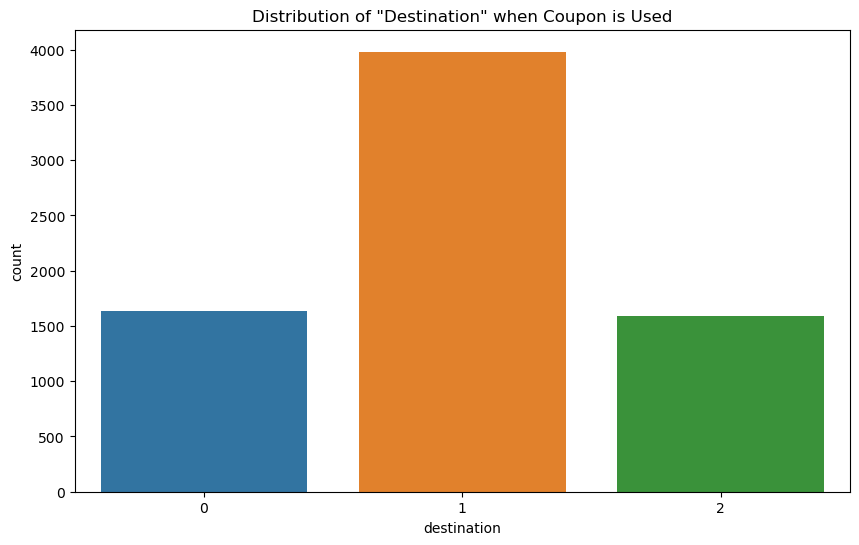

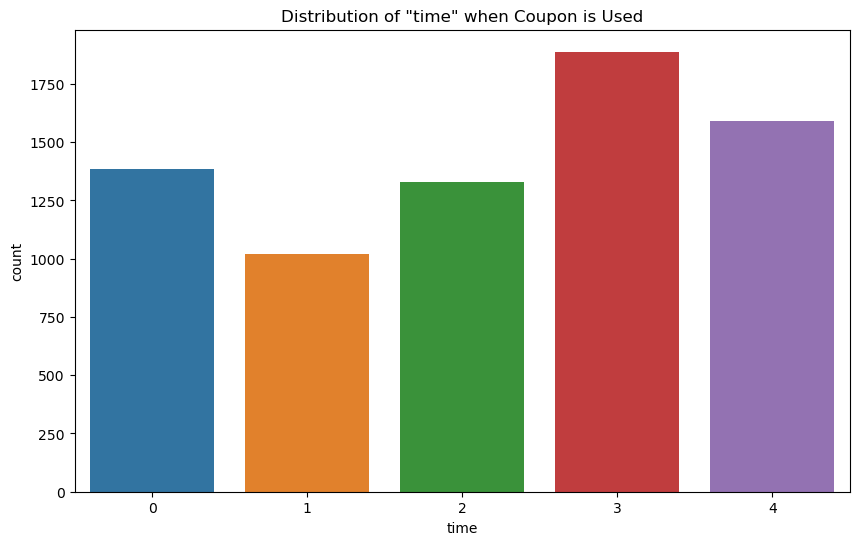

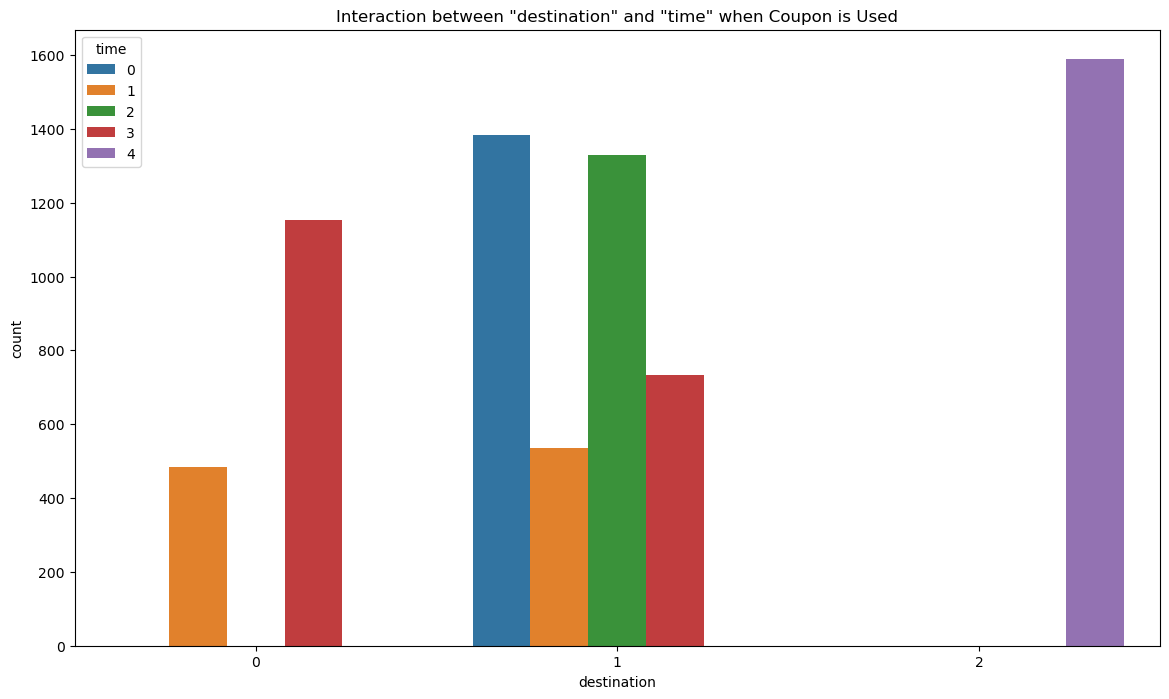

Frequency table for 'Destination':
1    3982
0    1639
2    1589
Name: destination, dtype: int64

Frequency table for 'Time':
3    1888
4    1589
0    1384
2    1329
1    1020
Name: time, dtype: int64


In [101]:
# Exploring distribution of 'Destination' and 'time' when coupon is used
coupon_used = df[df['Y'] == 1]

# Countplot for 'Destination'
plt.figure(figsize=(10, 6))
sns.countplot(data=coupon_used, x='destination')
plt.title('Distribution of "Destination" when Coupon is Used')
plt.show()

# Countplot for 'time'
plt.figure(figsize=(10, 6))
sns.countplot(data=coupon_used, x='time')
plt.title('Distribution of "time" when Coupon is Used')
plt.show()

# Exploring interaction between 'Destination' and 'time'
plt.figure(figsize=(14, 8))
sns.countplot(data=coupon_used, x='destination', hue='time')
plt.title('Interaction between "destination" and "time" when Coupon is Used')
plt.show()

# Frequency table for 'destination' when coupon is used
destination_counts = coupon_used['destination'].value_counts()
print("Frequency table for 'Destination':")
print(destination_counts)

# Frequency table for 'time' when coupon is used
time_counts = coupon_used['time'].value_counts()
print("\nFrequency table for 'Time':")
print(time_counts)


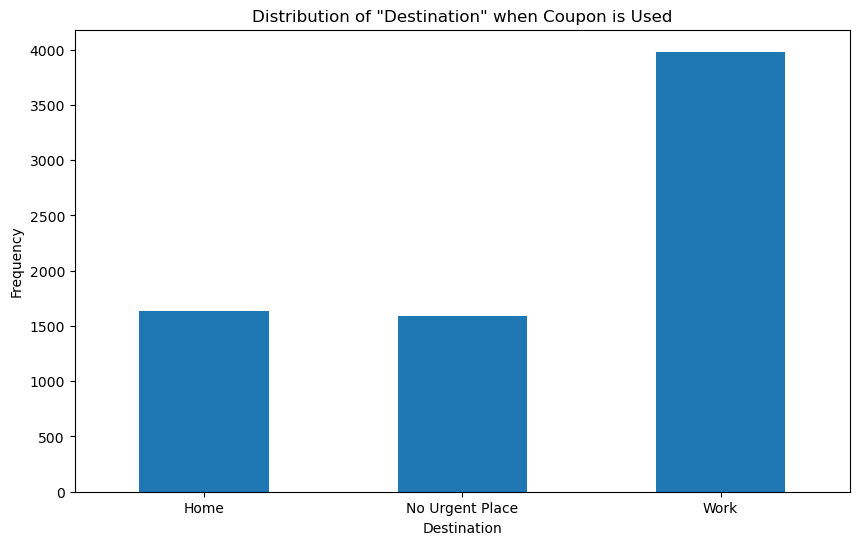

Text Table for 'Destination':
Home               1639
No Urgent Place    1589
Work               3982
Name: destination_str, dtype: int64


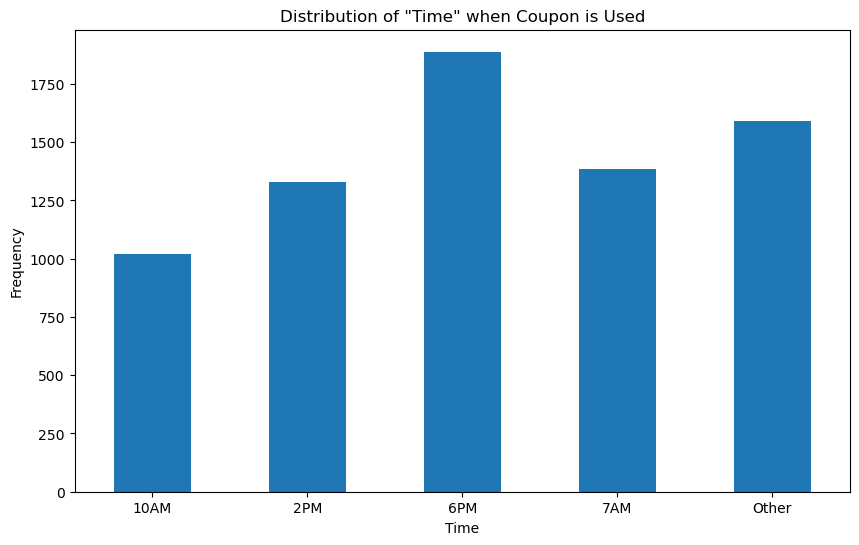


Text Table for 'Time':
10AM     1020
2PM      1329
6PM      1888
7AM      1384
Other    1589
Name: time_str, dtype: int64


<Figure size 1400x800 with 0 Axes>

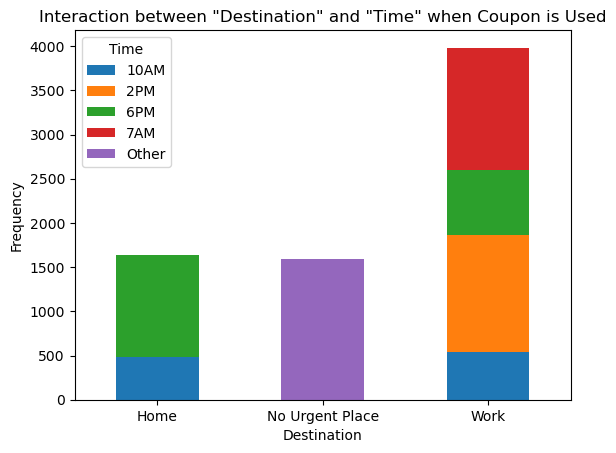


Text Table for Interaction between 'Destination' and 'Time':
time_str         10AM   2PM   6PM   7AM  Other
destination_str                               
Home              485     0  1154     0      0
No Urgent Place     0     0     0     0   1589
Work              535  1329   734  1384      0


In [103]:
# First, let's map the numerical 'destination' and 'time' to their actual string categories
destination_map = {0: 'Home', 1: 'Work', 2: 'No Urgent Place'}
time_map = {0: '7AM', 1: '10AM', 2: '2PM', 3: '6PM', 4: 'Other'}

df['destination_str'] = df['destination'].map(destination_map)
df['time_str'] = df['time'].map(time_map)

# Filter only rows where a coupon is used
coupon_used = df[df['Y'] == 1]

# Distribution of 'Destination' when Coupon is Used
destination_count = coupon_used['destination_str'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
destination_count.plot(kind='bar')
plt.title('Distribution of "Destination" when Coupon is Used')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Text Table for 'Destination':")
print(destination_count)

# Distribution of 'Time' when Coupon is Used
time_count = coupon_used['time_str'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
time_count.plot(kind='bar')
plt.title('Distribution of "Time" when Coupon is Used')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("\nText Table for 'Time':")
print(time_count)

# Interaction between 'Destination' and 'Time' when Coupon is Used
interaction_count = pd.crosstab(coupon_used['destination_str'], coupon_used['time_str'])
plt.figure(figsize=(14, 8))
interaction_count.plot(kind='bar', stacked=True)
plt.title('Interaction between "Destination" and "Time" when Coupon is Used')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.legend(title='Time')
plt.xticks(rotation=0)
plt.show()
print("\nText Table for Interaction between 'Destination' and 'Time':")
print(interaction_count)


### Machine Learning Approach for Deeper Analysis
Data Preprocessing:

Convert categorical variables like 'Destination' and 'Time' to numerical format using one-hot encoding.
Normalize continuous variables.
Handle missing data, if any.
Feature Selection:

Use algorithms like Recursive Feature Elimination (RFE) to find the most important variables affecting coupon usage.
Clustering:

Use K-means to segment the user base into distinct clusters based on 'Destination' and 'Time'.
Evaluate the clustering using metrics like silhouette score and Davies–Bouldin index.

In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# One-hot encode 'Destination' and 'Time'
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['destination', 'time']]).toarray()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluate clustering
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

C:\Users\Annik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.5902097560391889


Classification Models:
Use decision trees or random forests to classify instances where coupons will be used.
Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

In [111]:
# Label encode the ordinal columns
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

# Use 'Y' as the actual target column
X = df.drop(['Y'], axis=1)
y = df['Y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print feature importances
print("Feature importances:", clf.feature_importances_)

              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1128
           1       0.75      0.83      0.79      1409

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.75      2537
weighted avg       0.75      0.75      0.75      2537

Feature importances: [0.01173035 0.02877753 0.02071239 0.03318041 0.03150336 0.10365105
 0.03419632 0.02345884 0.06070859 0.03813245 0.01932263 0.04596094
 0.08277168 0.05762187 0.00245817 0.0517861  0.06309998 0.04695153
 0.04527901 0.04298261 0.         0.02511407 0.01080569 0.00911298
 0.00952309 0.0531795  0.01616216 0.03181671]


Using  Python's numpy.argmax() to get the index of the highest importance and then map it back to the dataset's column name.

In [112]:
# Get the index of the most important feature
most_important_index = np.argmax(clf.feature_importances_)

# Get the name of the most important feature
most_important_feature = X.columns[most_important_index]

print(f"The most important feature is {most_important_feature} with an importance of {clf.feature_importances_[most_important_index]}")

The most important feature is coupon with an importance of 0.10365105386802566


Since values in the "coupon" column are categorical data, a straightforward way to gain insights would be to count the frequency of each category. This can give us an idea of which types of coupons are more prevalent in the dataset.

In [114]:
from collections import Counter

# Assuming the 'coupon' column values are stored in a list called 'coupon_values'
coupon_values = [
    # your values here...
]

# Count the frequency of each type of coupon
coupon_counter = Counter(coupon_values)

# Sort the counter to make it easier to analyze
sorted_coupon_counter = {k: v for k, v in sorted(coupon_counter.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted frequency count
print("Sorted frequency count of coupon types:")
print(sorted_coupon_counter)

Sorted frequency count of coupon types:
{}


In [115]:
unique_coupon_values = df['coupon'].unique()

# Print unique values
print("Unique values in the 'coupon' column:")
print(unique_coupon_values)

Unique values in the 'coupon' column:
[4 2 1 0 3]
